Rum Yue

In [ ]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [4]:
train = pd.read_csv('/Users/xlyue/Documents/kaggle learning/S&P 500 stock data/sandp500/all_stocks_5yr.csv')

### Preprocessing

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
train.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [8]:
train = train.drop(train.loc[train['open'].isnull()].index)
train = train.drop(train.loc[train['high'].isnull()].index)
train = train.drop(train.loc[train['low'].isnull()].index)

#### Target trained stock: Amazon

In [9]:
amzn = train.loc[train['Name'] == 'AMZN']
amzn = amzn.reset_index(drop = True)

In [12]:
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


#### Subtract columns that we need
there are three ways to make it

In [13]:
# no.1
amzn_train = amzn.copy()
amzn_train.drop(['date', 'open', 'high', 'low', 'volume', 'Name'], axis = 1, inplace = True)

In [14]:
amzn_train.shape

(1259, 1)

In [60]:
# no.2
amzn_raw = amzn.iloc[:, 4:5]

In [61]:
amzn_raw.shape

(1259, 1)

In [67]:
# no.3
amzn_train = amzn.loc[:, amzn.columns == 'close']
amzn_train.shape

(1259, 1)

#### MinMaxScaler
feature scaling method to sort data without additional information about the data's distribution

In [15]:
# this step is important since otherwise the scaler does not recognize your training data "X"
sc = MinMaxScaler()
trainset = sc.fit_transform(amzn_train.values)

In [16]:
trainset.shape

(1259, 1)

### Create datasets to train
we give predictions on every two months

In [17]:
X_train = []
y_train = []
period = 60
for i in range(period, len (trainset)):
    # use append function since append treat the target as a whole rather than extend solely to get a list of list elements
    X_train.append(trainset[i - period: i])
    y_train.append(trainset[i])
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [31]:
X_train.shape

(1199, 60, 1)

In [32]:
y_train.shape

(1199, 1)

### Train the model

In [35]:
md = Sequential()

In [36]:
md.add(LSTM(units = 92, return_sequences = True, input_shape = (X_train.shape[1], 1)))
md.add(Dropout(0.2))

md.add(LSTM(units = 92, return_sequences = True))
md.add(Dropout(0.2))

md.add(LSTM(units = 92, return_sequences = True))
md.add(Dropout(0.2))

md.add(LSTM(units = 92, return_sequences = False))
md.add(Dropout(0.2))

md.add(Dense(units = 1))
md.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [37]:
md.fit(X_train, y_train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0136
Epoch 2/50
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 3/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 4/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 5/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 6/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 7/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 8/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 9/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 10/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 11/50
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 12/50
1199/1199 [==============

### Verify the model performance

In [41]:
gs = train.loc[train['Name'] == 'GS']
gs.head()

,date,open,high,low,close,volume,Name
257578,2013-02-08,150.78,151.970,150.3500,151.60,3612229,GS
257579,2013-02-11,151.42,152.870,150.9601,152.24,3751274,GS
257580,2013-02-12,152.48,154.320,151.7900,154.11,4307556,GS
257581,2013-02-13,154.11,154.850,153.2800,154.52,4368576,GS
257582,2013-02-14,153.84,156.719,153.6200,155.93,5035367,GS


In [42]:
# here we use method no.3
gs = gs.loc[:, gs.columns == 'close']
gs.head()

,close
257578,151.60
257579,152.24
257580,154.11
257581,154.52
257582,155.93


In [52]:
gs_test = gs.iloc[period:].values

In [53]:
gs_train = gs.values

In [54]:
gs_trainset = sc.transform(gs_train)

In [55]:
X_test = []
y_test = gs_test
period = 60
for i in range(period, len(trainset)):
    # use append function since append treat the target as a whole rather than extend solely to get a list of list elements
    X_test.append(gs_trainset[i - period: i])

X_test = np.asarray(X_test)

In [56]:
X_test.shape

(1199, 60, 1)

In [57]:
y_pred = md.predict(X_test)
gs_predict_price = sc.inverse_transform(y_pred)

### Visualize the comparison between true & predicted prices

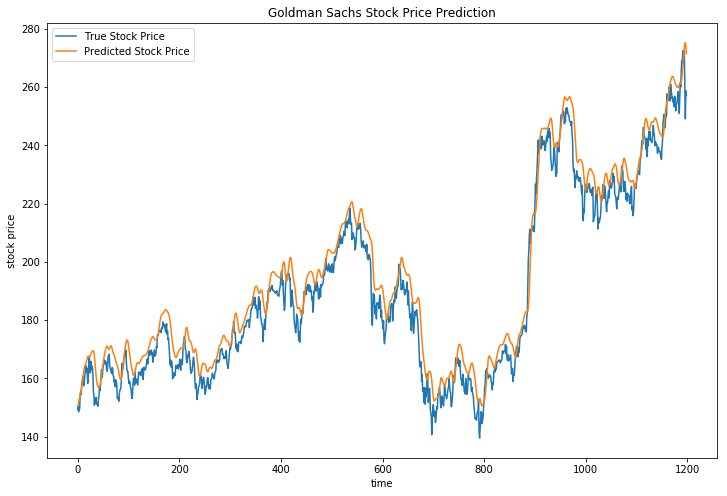

In [58]:
plt.figure(figsize = (12, 8))
plt.plot(y_test, label = 'True Stock Price')
plt.plot(gs_predict_price, label = 'Predicted Stock Price')

plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('stock price')

plt.legend()
plt.show()

### Conclusion
The prediction is based on true price values after two months. 

In the training process, the model predicts the current price using information of every past two months.

After training, we seperate X and y trainset to make predictions using every 60 days information on the following 61th day.

Through the fitting plot, we can use this LSTM model to predict stock prices in the near future.